# Explorando SpaCy

In [ ]:
!conda install -c conda-forge spacy -y

In [ ]:
!python -m spacy download es

In [1]:
import spacy

In [2]:
from spacy.attrs import ORTH

In [3]:
nlp = spacy.load('es')

#### load the text

In [5]:
with open("../data/processed/Residente-limpio.txt", "r", encoding = "utf-8") as file:
    text = file.read()

In [6]:
doc = nlp(text)

In [8]:
all_tags = {word.pos: word.pos_ for word in doc}

all_tags

{102: 'SPACE',
 86: 'AUX',
 84: 'ADP',
 99: 'VERB',
 89: 'DET',
 91: 'NOUN',
 92: 'NUM',
 95: 'PROPN',
 98: 'SYM',
 85: 'ADV',
 87: 'CONJ',
 97: 'SCONJ',
 83: 'ADJ',
 96: 'PUNCT',
 94: 'PRON',
 90: 'INTJ'}

| POS | Definition |
|:---:|:----------:|
ADJ | adjective
ADP | adposition
ADV | adverb
AUX | auxiliary
CCONJ | coordinating conjunction
DET | determiner
INTJ | interjection
NOUN | noun
NUM | numeral
PART | particle
PRON | pronoun
PROPN | proper noun
PUNCT | punctuation
SCONJ | subordinating conjunction
SYM | symbol
VERB | verb
X: other

In [21]:
#define some parameters  
noisy_pos_tags = ["PROPN", "SPACE", "PUNCT", "CONJ", "AUX", "ADP", "ADV", "DET", "INTJ", "SCONJ", "PRON"]
min_token_length = 2

#Function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

# top unigrams used in the reviews 
from collections import Counter
cleaned_list = [cleanup(word.lemma_) for word in doc if not isNoise(word)]



top_100 = Counter(cleaned_list).most_common(100)

In [22]:
print(top_100)

[('venir', 55), ('loco', 24), ('querer', 18), ('mirar', 18), ('noche', 17), ('tocar', 16), ('servir', 16), ('sábana', 16), ('gua', 13), ('cabeza', 12), ('chorro', 12), ('ver', 12), ('fiesta', 12), ('gente', 10), ('meter', 9), ('decir', 9), ('crema', 9), ('poner', 8), ('rimar', 8), ('lechón', 8), ('jamón', 8), ("vo'a", 8), ('poblar', 8), ('mira', 8), ('único', 8), ('casar', 7), ('escuchar', 7), ('sentir', 7), ('tirar', 7), ('vender', 7), ('13', 7), ('puré', 7), ('llorar', 7), ('frente', 6), ('tengo', 6), ('hambre', 6), ('mundo', 6), ('dejar', 6), ('teta', 6), ('comer', 6), ('cerebro', 6), ('tener', 6), ('mente', 6), ('piel', 6), ('bailar', 6), ('traer', 6), ('culpar', 6), ('matar', 6), ('herrar', 6), ('huevar', 6), ('yema', 6), ('avenar', 6), ('protagonista', 6), ('escena', 6), ('dar', 5), ('par', 5), ('barriga', 5), ('culo', 5), ('mesar', 5), ('gustar', 5), ('personal', 5), ('morir', 5), ('entender', 5), ('sangrar', 5), ('viejo', 5), ('desayunar', 5), ('callar', 5), ('barrio', 5), ('cu

In [11]:
i = 1
print("Las 25 palabras mas usadas por Residente en sus primeros 3 discos:")
for word in top_100:
    print(f"{i}. { word[0].capitalize()}, {word[1]}")
    i += 1

Las 25 palabras mas usadas por Residente en sus primeros 3 discos:
1. Vienen, 49
2. Mira, 22
3. Noche, 17
4. Sirve, 16
5. Sábana, 16
6. Quiero, 14
7. Gua, 13
8. Toca, 13
9. Chorro, 12
10. Loco, 12
11. Fiesta, 12
12. Locos, 12
13. Gente, 10
14. Cabeza, 10
15. Crema, 9
16. Vo'a, 8
17. Pueblo, 8
18. Único, 8
19. Casa, 7
20. Tienes, 7
21. Veo, 7
22. 13, 7
23. Puré, 7
24. Frente, 6
25. Tengo, 6
26. Hambre, 6
27. Mundo, 6
28. Cerebro, 6
29. Mente, 6
30. Piel, 6
31. Culpa, 6
32. Hierro, 6
33. Huevo, 6
34. Yema, 6
35. Avena, 6
36. Protagonistas, 6
37. Escena, 6
38. Lloren, 6
39. Viene, 6
40. Tetas, 5
41. Par, 5
42. Barriga, 5
43. Digo, 5
44. Personal, 5
45. Sangre, 5
46. Calle, 5
47. Cuello, 4
48. Rimas, 4
49. Gallo, 4
50. Leche, 4
51. Fucking, 4
52. Culo, 4
53. Hombre, 4
54. Cara, 4
55. Lechones, 4
56. Lechón, 4
57. Jamones, 4
58. Jamón, 4
59. Millón, 4
60. Mamones, 4
61. Gusta, 4
62. Importa, 4
63. Escuchando, 4
64. Botando, 4
65. Traigo, 4
66. Desayuno, 4
67. Quiera, 4
68. Letra, 4
69. Lubr

In [ ]:
text

In [15]:
with open("../data/processed/residente_top_100.csv", "w", encoding = "utf-8") as file:
    file.write("palabra,cuenta\n")
    for i in range(100):
        file.write(f"{top_100[i][0]},{top_100[i][1]}\n")

In [17]:
!conda install -c conda-forge altair -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.8
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - altair


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py36_1         461 KB  conda-forge

The following NEW packages will be INSTALLED:

    altair: 2.2.2-py36_1 conda-forge


altair-2.2.2         |  461 KB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [18]:
import altair as alt

In [41]:
%run theme.py

In [40]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

In [20]:
data = alt.pd.read_csv("../data/processed/residente_top_100.csv")

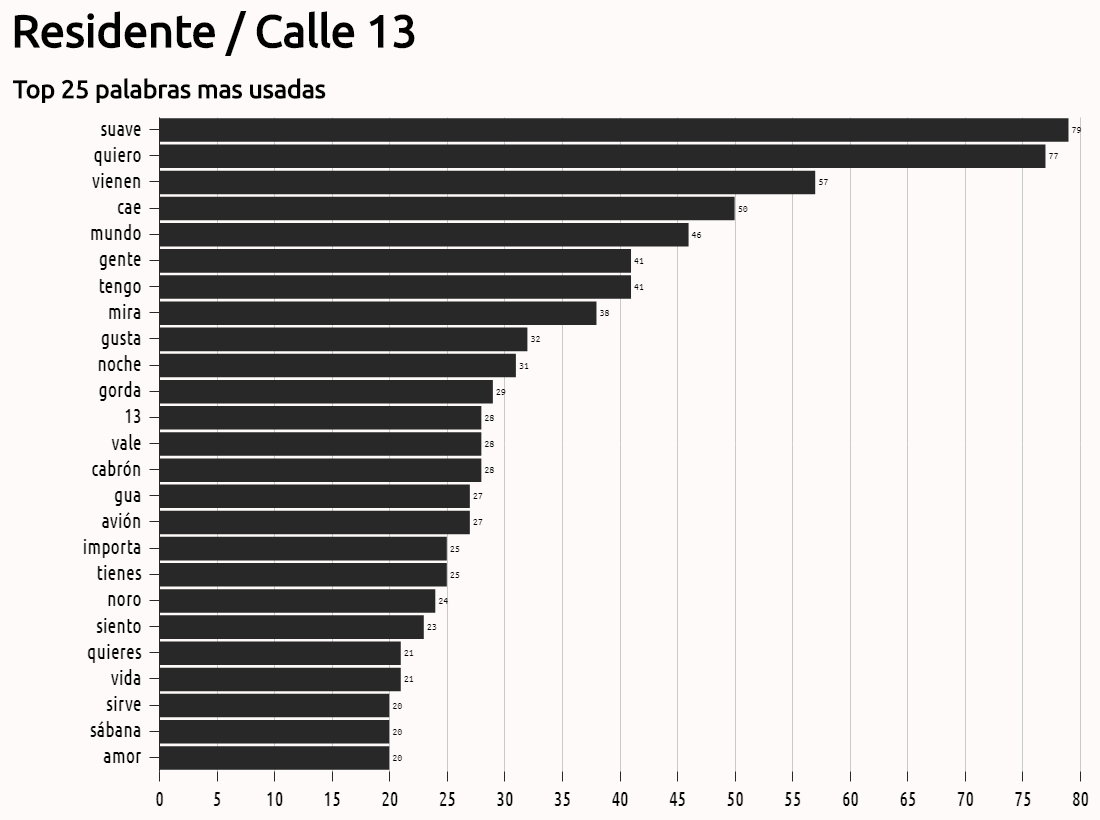

In [58]:
data.sort_values('cuenta', ascending = False, inplace = True)

chart25 = alt.Chart(data.iloc[:25]).mark_bar().encode(
    x = alt.X('cuenta:Q', sort = 'ascending'),
    y = alt.Y('palabra:N', scale = alt.Scale(domain = list(data.iloc[:25]['palabra'])), axis = alt.Axis(title = "Top 25 palabras mas usadas")),
).properties(
    title = "Residente / Calle 13"
)

text25 = chart25.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='cuenta'
)

final_25 = chart25 + text25

final_25.configure_axisLeft(titleAngle= 0, titleY = -15, titleX = 10, titleFontSize=25).configure_title(fontSize = 45)

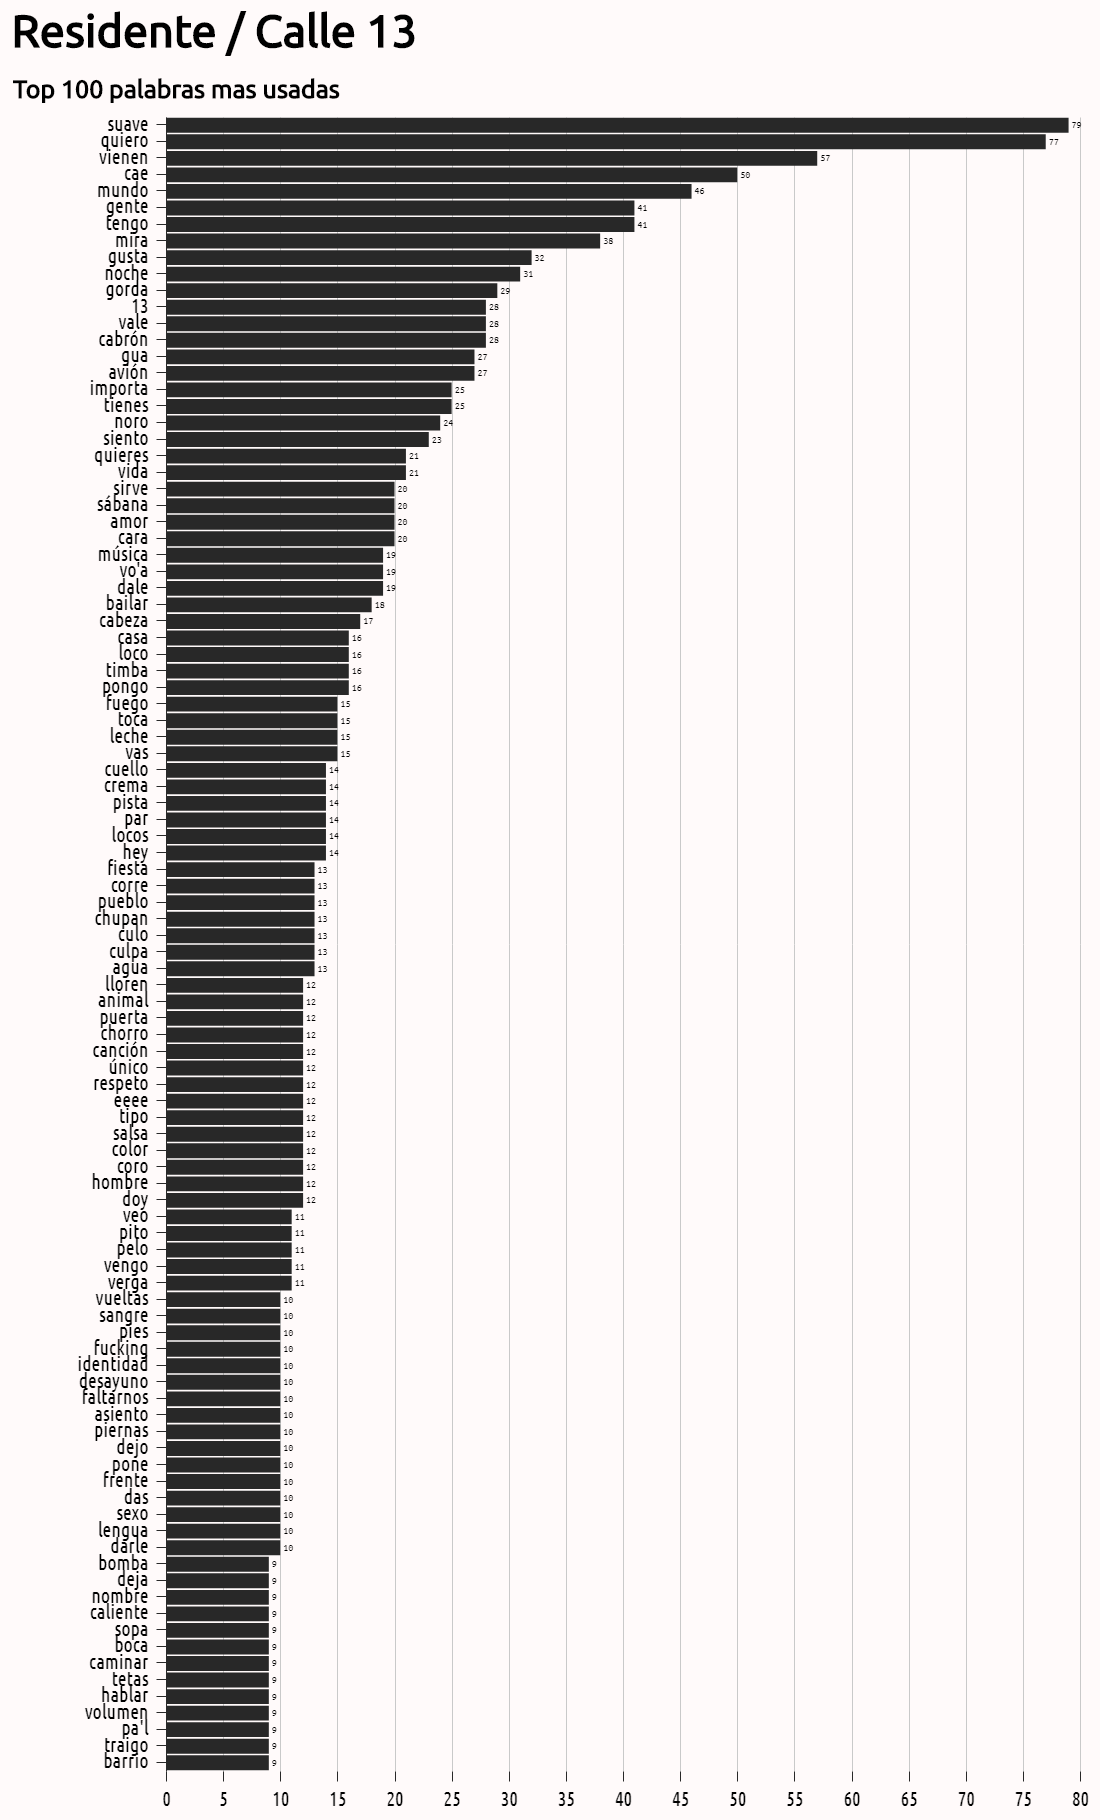

In [60]:
chart100 = alt.Chart(data).mark_bar().encode(
    x = alt.X('cuenta:Q', sort = 'ascending'),
    y = alt.Y('palabra:N', scale = alt.Scale(domain = list(data['palabra'])), axis = alt.Axis(title = "Top 100 palabras mas usadas")),
).properties(
    title = "Residente / Calle 13",
    height = 1800
)

text100 = chart100.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='cuenta'
)

final_100 = chart100 + text100
final_100.configure_axisLeft(titleAngle= 0, titleY = -15, titleX = 10, titleFontSize=25).configure_title(fontSize = 45)